![alt text](Capture8.png "Title")

###  <font color=red>Working with MNIST Dataset</font> ###

__In this question, you are given the MNIST dataset, which consists of 70,000 images of digits handwritten by students and employees of US Census Bureau.__

You are supposed to perform a binary classification task, separating digit 4 from others (0,1,2,3,5,6,7,8,9). The data could be downloaded using the code below:

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
# This will take less than a minute to run.

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

D:\Anacondaaa\lib\site-packages\sklearn\datasets\openml.py:51: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


### <font color=green>1:</font> ###

__In the first step, you are going to get acquainted with the dataset.__

Randomly, plot three digits from the dataset.

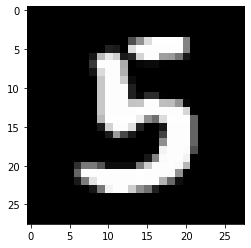

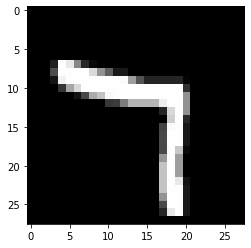

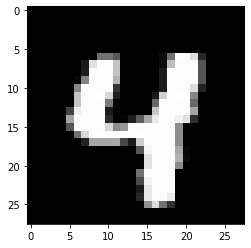

In [3]:
import random
randomlist = random.sample(range(1, 70000), 3)
image = X[randomlist[0]].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.show()
image = X[randomlist[1]].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.show()
image = X[randomlist[2]].reshape(28, 28)
plt.imshow(image, cmap='gray')
plt.show()

### <font color=green>2:</font> ###
__In the second step, you should build your dataset. Do as follows:__
* Split your training and testing dataset (80% and 20%).
* Set the random_state to 10.
* As your goal is to identify digit 4, create the target vectors for this classification task  <font color=red>(note that you are training a binary classifier)</font>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, np.asarray([i == '4' for i in y]), test_size=0.2, random_state=10)

### <font color=green>3:</font> ###
__Do the classification task using a <font color=red>Gaussian Naive Bayes Classifier</font>__

In [5]:
model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred) * 100)

Accuracy 40.34285714285714


### <font color=green>4:</font> ###
__Calculate the following values:__
* Confusion Matrix
* Accuracy
* Sensitivity
* Specificity
* Precision
* Recall

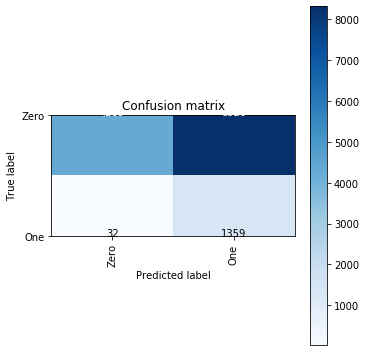

              precision    recall  f1-score   support

        Zero       0.99      0.34      0.51     12609
         One       0.14      0.98      0.25      1391

    accuracy                           0.40     14000
   macro avg       0.57      0.66      0.38     14000
weighted avg       0.91      0.40      0.48     14000



In [6]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, ['Zero','One'])
plt.show()
print(classification_report(y_test, y_pred, target_names = ['Zero','One']))

### <font color=green>5:</font> ###
__Now plot <font color=red>the ROC curve</font>, then calculate <font color=red>Area Under ROC (AUROC)</font>__

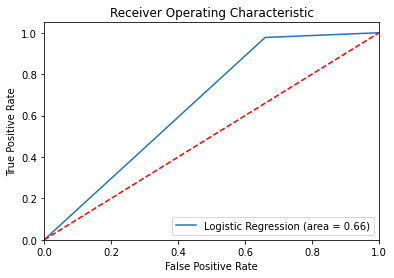

0.6585744130021581

In [12]:
def plot_ROC(y_test, y_pred):
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' %
             logit_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    return fpr,tpr

fpr ,tpr = plot_ROC(y_test, y_pred)
auc(fpr, tpr)

### <font color=green>6:</font> ###
__Finally, apply a 5-fold cross validation, and report your <font color=red>mean and std values</font>.__

In [9]:
print("Accuracy :", (np.mean(cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')) * 100, "% +-", np.std(cross_val_score(model, X, y, cv = 5, scoring = 'accuracy'))*100), "%")

Accuracy : (55.655738534260365, '% +-', 0.6213430330790972) %


### <font color=green>7:</font> ###
__How are your results?__

__Is <font color=red>Gaussian Naive Bayes Classifier</font> a good one for this problem?__

No it is not a good classifier for this problem since our accuracy is a low percentage of 55%

### __Repeat all the steps using <font color=green>Nearest Centroid Classifier</font> and <font color=green>Logistic Regression Classifier</font>.__ ### 
* You just need to make some changes to step 3!
* You should report all the values in steps 4, 5, and 6

In [10]:
model = LogisticRegression(random_state = 10, max_iter = 200).fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred) * 100)

D:\Anacondaaa\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy 98.21428571428571


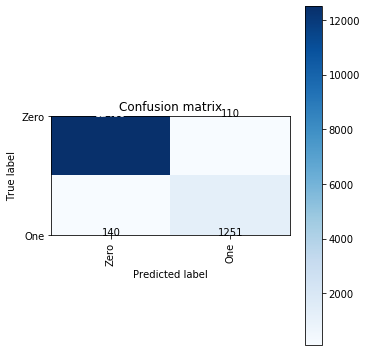

              precision    recall  f1-score   support

        Zero       0.99      0.99      0.99     12609
         One       0.92      0.90      0.91      1391

    accuracy                           0.98     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.98      0.98      0.98     14000



In [11]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, ['Zero','One'])
plt.show()
print(classification_report(y_test, y_pred, target_names = ['Zero','One']))

In [12]:
fpr ,tpr = plot_ROC(y_test, y_pred)
auc(fpr, tpr)

NameError: name 'plot_ROC' is not defined

In [ ]:
print("Accuracy :", (np.mean(cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')) * 100, "% +-", np.std(cross_val_score(model, X, y, cv = 5, scoring = 'accuracy'))*100), "%")

This method did a great job by achieving 91% accuracy.

In [ ]:
model = NearestCentroid(metric = 'euclidean').fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred) * 100)

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx, ['Zero','One'])
plt.show()
print(classification_report(y_test, y_pred, target_names = ['Zero','One']))

In [ ]:
fpr ,tpr = plot_ROC(y_test, y_pred)
auc(fpr, tpr)

In [ ]:
print("Accuracy :", (np.mean(cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')) * 100, "% +-", np.std(cross_val_score(model, X, y, cv = 5, scoring = 'accuracy'))*100), "%")

In [ ]:
The last method implemented was NearestCentroid and did an accepatble job by scoring 87% accuracy.

### __Which one is better? Report it.__ ###

The best one is logistic regression with 91% accuracy.

_________________________________________________________

### <font color=blue>I hope you learned all the materials covered in the hands-on sessions.</font> ###
### <font color=blue>Good luck :)</font> ###